# Setup

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import helpers as hp
import plotly.express as px
from RandomForestAnalysis import RandomForestAnalysis

# to show all columns
pd.set_option("display.max_rows", 20, "display.max_columns", None)

# Random Forest model with k-fold stratified cross-validation

## Breast cancer dataset

In [2]:
rf = RandomForestResults(csv_file_path="data/breast-cancer.csv")

In [5]:
rf.features

,clump,uniformity_cell_size,uniformity_cell_shape,adhesion,epithelial_cell_size,bare_nuclei,chromatin,nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1
679,2,1,1,1,2,1,1,1,1
680,5,10,10,3,7,3,8,10,2
681,4,8,6,4,3,4,10,6,1


In [ ]:
#features, labels, feature_names = hp.import_data_and_separate_features_from_labels("data/breast-cancer.csv")

In [ ]:
scores, feature_importances, confusion_matrix_disp, pos_label_scores = hp.random_forest_with_stratified_kfold_cv(kfolds=5, features=features, labels=labels, n_trees=1000, rand_state=123, positive_class="malign")

This is the average training score: 1.0
This is the average test score: 0.974


In [ ]:
scores

,train,test
mean,1.0,0.974
sd,0.0,0.007


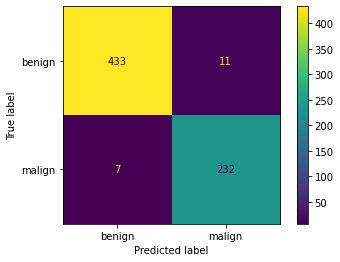

In [ ]:
confusion_matrix_disp.plot()